# Title of poster

*Stefan Pophristic & Kathryn Schuler; poster presented at the 2021 LSA annual meeting*

- [link to poster](add-when-complete)
- [link to short video intro](add-when-complete)




In [3]:
# install packages 
#install.packages('tidyjson')

#then load what we need
options(tidyverse.quiet = TRUE) # load tidyverse but be quiet about it
library(tidyverse)
library(tidyjson)
library(knitr)

In [16]:
# get our data
rawdata <- read.csv('2021-poster-lsa/2020-12-22-exp16-data.csv') %>%
    filter(data != "", !(participant %in% c(0, "5cc08aa4d923cf0016ea55a5"))) # filter out our testers

data <- rawdata %>%
    as.tbl_json(json.column="data") %>% gather_array %>% spread_all %>%
    enter_object(answers) %>% # handle the cloze answers
    mutate(answers = ..JSON)

surveydata <- rawdata %>%
    as.tbl_json(json.column="data") %>% gather_array %>% spread_all
    

In [19]:
responses <- data %>% 
    mutate(is_novel = ifelse(correct_answer == "none", 1, 0)) %>%
    mutate(is_correct = ifelse(correct_answer == answers, 1, 0)) %>%
    group_by(random_id, is_novel, image, sentence) %>%
    summarise(n = n(), answer = unlist(unique(answers)))

responses %>% head() 

`summarise()` regrouping output by 'random_id', 'is_novel', 'image' (override with `.groups` argument)



random_id,is_novel,image,sentence,n,answer
<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
3gjn0frayvcu,0,cat,<p>Ovo je moja mačka.</p><p>Mačka hoće moju loptu. </p><p>Ja hoću loptu.</p><p>Kojoj životinji ću dati loptu?</p><p>Ja ću dati loptu %mački%.</p>,1,mački
3gjn0frayvcu,0,cat,<p>Ovo je moja mačka.</p><p>Teta hoće ovu životinju.</p><p>Koju životinju hoće teta?</p><p>Teta hoće %mačku%.</p>,1,mačku
3gjn0frayvcu,0,cat_ball,<p>Ovo je moja mačka.</p><p>Mačka ima loptu.</p><p>Ja hoću loptu.</p><p>Od koje životinje ću uzeti loptu?</p><p>Ja ću uzeti loptu od %mačke%.</p>,1,mačke
3gjn0frayvcu,0,duckling,<p>Ovo je moje pače.</p><p>Pače hoće moju loptu. </p><p>Ja hoću loptu.</p><p>Kojoj životinji ću dati loptu?</p><p>Ja ću dati loptu %pačetu%.</p>,1,pačetu
3gjn0frayvcu,0,duckling_ball,<p>Ovo je moje pače.</p><p>Pače ima loptu.</p><p>Ja hoću loptu.</p><p>Od koje životinje ću uzeti loptu?</p><p>Ja ću uzeti loptu od %pačeta%.</p>,1,pačeta
3gjn0frayvcu,0,egg,<p>Ovo je jaje.</p><p>Čije je ovo?</p><p>Jaje je %moje%.</p>,1,moje


In [20]:
testblocks <- data.frame(
        image = c("monster_1", "monster_2"
                  , "monster_3", "monster_4", "monster_5", "monster_6"
                  , "monster_7", "monster_8", "monster_9", "monster_10"
                  , "object_1", "object_2", "object_3", "object_4")
        , block = c("accusative", "accusative"
               , "genative", "genative", "genative", "genative"
               , "dative", "dative", "dative", "dative"
               , "gender", "gender", "gender", "gender")
        , prompt = c("strum", "neska"
                    , "kust", "grasa", "tero", "slume"
                    , "djat", "vruda", "guno", "klune"
                    , "pok", "kiza", "sigo", "meve")
    )

responses <- responses %>% 
    filter(is_novel == 1) %>%
    left_join(testblocks, by = "image")

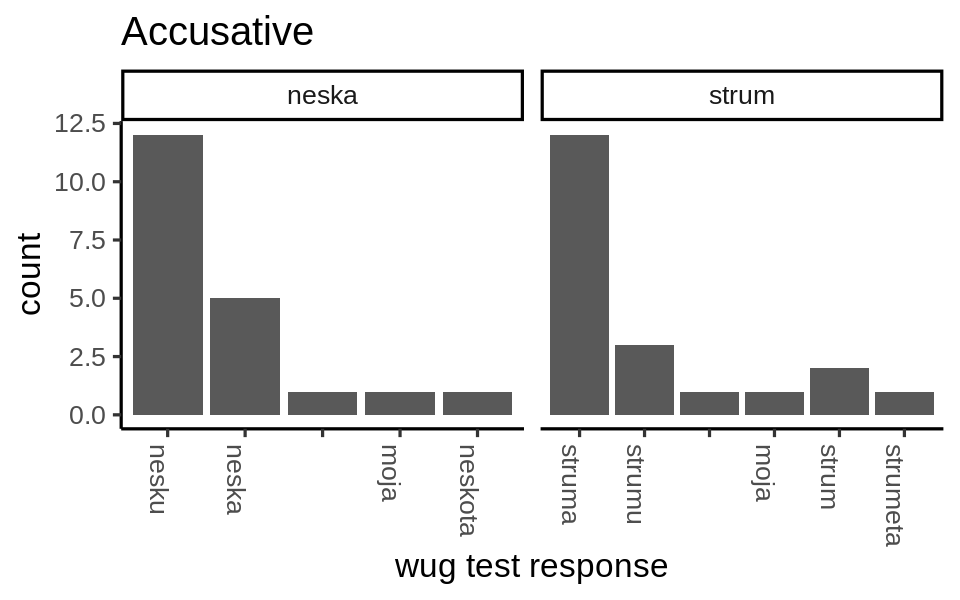

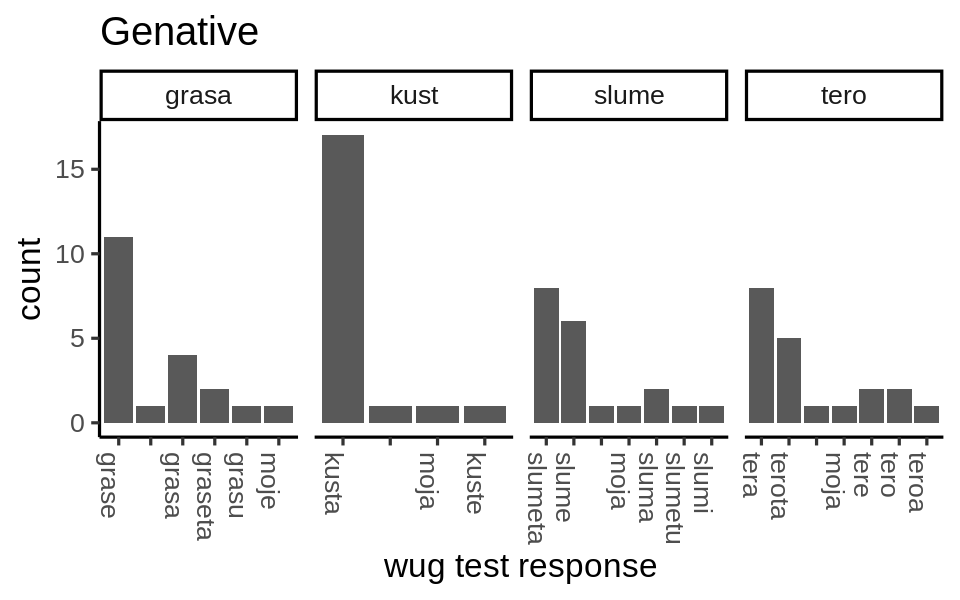

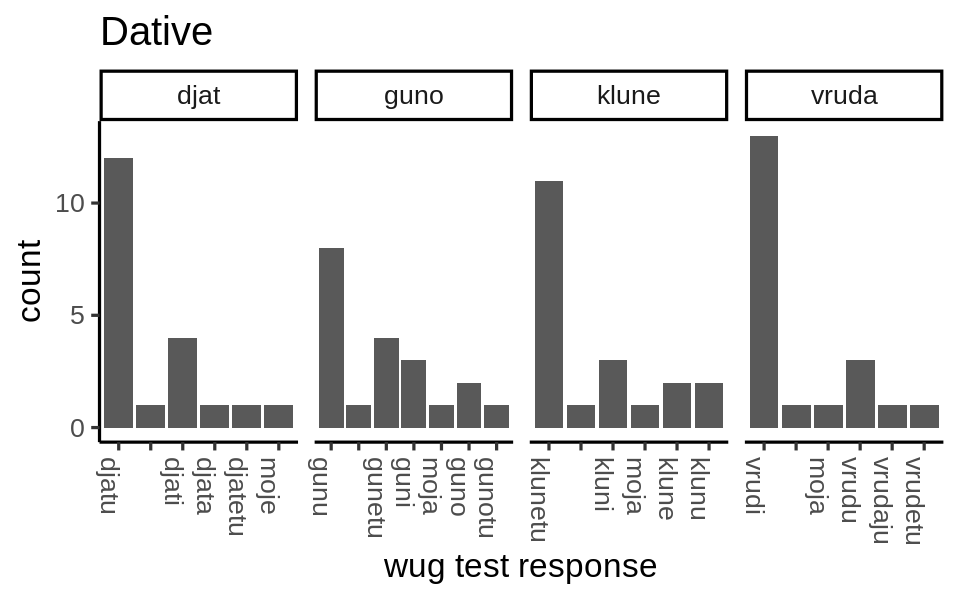

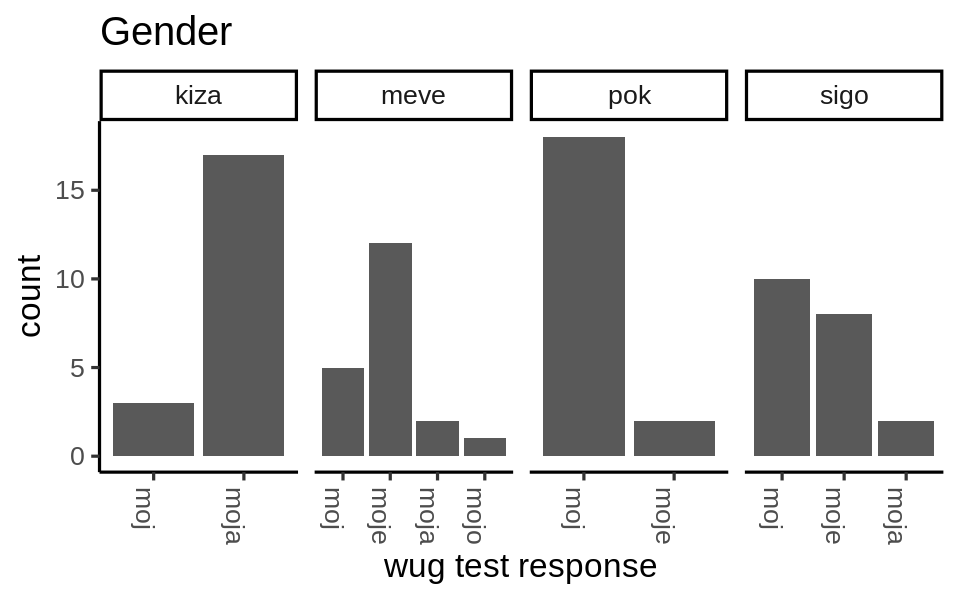

In [22]:

options(repr.plot.width = 8, repr.plot.height = 5)

library(forcats)

ggplot(filter(responses, is_novel == 1, block == "accusative")) +
    facet_grid( ~ prompt, scales = "free") +
    geom_bar(mapping = aes(x=fct_infreq(answer))) +
    theme_classic(base_size = 20) +
    theme(axis.text.x=element_text(angle = -90, hjust = 0)) +
    theme(legend.position = "None") +
    labs(title = "Accusative", x = "wug test response")

ggplot(filter(responses, is_novel == 1, block == "genative")) +
    facet_grid( ~ prompt, scales = "free") +
    geom_bar(mapping = aes(x=fct_infreq(answer))) +
    theme_classic(base_size = 20) +
    theme(axis.text.x=element_text(angle = -90, hjust = 0)) +
    theme(legend.position = "None") +
    labs(title = "Genative", x = "wug test response")

ggplot(filter(responses, is_novel == 1, block == "dative")) +
    facet_grid( ~ prompt, scales = "free") +
    geom_bar(mapping = aes(x=fct_infreq(answer))) +
    theme_classic(base_size = 20) +
    theme(axis.text.x=element_text(angle = -90, hjust = 0)) +
    theme(legend.position = "None") +
    labs(title = "Dative", x = "wug test response")

ggplot(filter(responses, is_novel == 1, block == "gender")) +
    facet_grid( ~ prompt, scales = "free") +
    geom_bar(mapping = aes(x=fct_infreq(answer))) +
    theme_classic(base_size = 20) +
    theme(axis.text.x=element_text(angle = -90, hjust = 0)) +
    theme(legend.position = "None") +
    labs(title = "Gender", x = "wug test response")

In [23]:
surveydata %>% filter(trial_type == 'survey-text') %>%
    select(random_id, responses)

,random_id,responses,..JSON
,<chr>,<chr>,<list>
1,tu14nguolemf,"{""Q0"":""Da"",""Q1"":"""",""Q2"":""Ne, engleski i italianski su bili prvi "",""Q3"":""Ne, engleski "",""Q4"":""Holandija (The Netherlands)"",""Q5"":""Serbian is my mother tongue but we speak italian at home due to my serbian family member speaking fluent italian. Also due to learning english and dutch at school, it has not taken priority. ""}","164622 , {""Q0"":""Da"",""Q1"":"""",""Q2"":""Ne, engleski i italianski su bili prvi "",""Q3"":""Ne, engleski "",""Q4"":""Holandija (The Netherlands)"",""Q5"":""Serbian is my mother tongue but we speak italian at home due to my serbian family member speaking fluent italian. Also due to learning english and dutch at school, it has not taken priority. ""}, survey-text , 32 , 514517 , 0.0-3.0"
2,4y3ryvudfkem,"{""Q0"":""Srpski mi je maternji jezik."",""Q1"":""Srpski znam od rodjenja."",""Q2"":""Da, srpski i engleski su bili primarni jezici."",""Q3"":""Da, srpski je bio primarni jezik u skoli.Drugi jezici su bili engleski i nemacki."",""Q4"":""U Srbiji"",""Q5"":""Srpski mi je maternji jezik i imam obimno znanje iz pravopisa i gramatike. \nEngleski, francuski i nemacki govorim tecno, ali najbolje poznajem englesku gramatiku i pravopis te bih mogao da izdvojim engleski kao drugi maternji jezik.""}","892708.335000003 , {""Q0"":""Srpski mi je maternji jezik."",""Q1"":""Srpski znam od rodjenja."",""Q2"":""Da, srpski i engleski su bili primarni jezici."",""Q3"":""Da, srpski je bio primarni jezik u skoli.Drugi jezici su bili engleski i nemacki."",""Q4"":""U Srbiji"",""Q5"":""Srpski mi je maternji jezik i imam obimno znanje iz pravopisa i gramatike. \nEngleski, francuski i nemacki govorim tecno, ali najbolje poznajem englesku gramatiku i pravopis te bih mogao da izdvojim engleski kao drugi maternji jezik.""}, survey-text , 32 , 1809693 , 0.0-3.0"
3,w8en5a82br1q,"{""Q0"":""NE"",""Q1"":""bio sam 10/11 kad sam se naučio bosanki,hrvatski i srpski jezik."",""Q2"":""NE vsi smo slovenci."",""Q3"":""Pričali smo po slovenski."",""Q4"":""Slovenija, Murska Sobota."",""Q5"":""Ne""}","260769.345 , {""Q0"":""NE"",""Q1"":""bio sam 10/11 kad sam se naučio bosanki,hrvatski i srpski jezik."",""Q2"":""NE vsi smo slovenci."",""Q3"":""Pričali smo po slovenski."",""Q4"":""Slovenija, Murska Sobota."",""Q5"":""Ne""}, survey-text , 32 , 804595 , 0.0-3.0"
4,9hc4ulkph704,"{""Q0"":""ne"",""Q1"":""6-7"",""Q2"":""ne"",""Q3"":""ne"",""Q4"":""Makedonija"",""Q5"":""ne""}","38781 , {""Q0"":""ne"",""Q1"":""6-7"",""Q2"":""ne"",""Q3"":""ne"",""Q4"":""Makedonija"",""Q5"":""ne""}, survey-text , 32 , 375611 , 0.0-3.0"
5,r3jyk97claex,"{""Q0"":""Da, ali sam ga zaista naučila tek oko 11 godine."",""Q1"":""Nisam ga učila kao strani jezik."",""Q2"":""I srpski i italijanski su se govorili podjednako, u zavisnosti od teme i situacije."",""Q3"":""Ne, u školi sam govorila italijanski kao primarni jezik."",""Q4"":""U Italiji."",""Q5"":""""}","107787 , {""Q0"":""Da, ali sam ga zaista naučila tek oko 11 godine."",""Q1"":""Nisam ga učila kao strani jezik."",""Q2"":""I srpski i italijanski su se govorili podjednako, u zavisnosti od teme i situacije."",""Q3"":""Ne, u školi sam govorila italijanski kao primarni jezik."",""Q4"":""U Italiji."",""Q5"":""""}, survey-text , 32 , 284141 , 0.0-3.0"
6,3gjn0frayvcu,"{""Q0"":""nije"",""Q1"":""nisam se aktivno učila"",""Q2"":""ne gorovilo se je samo slovenščina"",""Q3"":""ne. ali učili smo se engleski i njemački"",""Q4"":""Slovenija"",""Q5"":""nisam se jih učila ali smo gledali hrvatski TV, čitala sam hrvatske stripove in svako ljeto smo otišli na hrvatsko.""}","147347 , {""Q0"":""nije"",""Q1"":""nisam se aktivno učila"",""Q2"":""ne gorovilo se je samo slovenščina"",""Q3"":""ne. ali učili smo se engleski i njemački"",""Q4"":""Slovenija"",""Q5"":""nisam se jih učila ali smo gledali hrvatski TV, čitala sam hrvatske stripove in svako ljeto smo otišli na hrvatsko.""}, survey-text , 32 , 429627 , 0.0-3.0"
7,rqcq3q09hwxx,"{""Q0"":""Da"",""Q1"":"""",""Q2"":""